In order to get the final results presented in the report, the cells that are numbered using # should be run in the stated order. Other non-numbered cells, can be used to show some intermediate outputs but are not necessary to get the final results.

# Cleaning

First, we have the imports for the libraries that will be needed, as well as an ordered list of the months. This list is required because when the months are sorted automatically, they sorted alphabetically. Therefore, this list is used to override the alphabetic sorting. 

In [4]:
#1
import os

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import calendar         # to convert file numbers to name of month
import copy             # make a deep copy of a DF not just a pointer

# sorted index to give correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

Next is the read_data method which reads takes as an input the directory where the csv files are located, and returns the data in the form of a  multi-index DataFrame. 

In [5]:
#2
# input:    name of the directory where csv files are stored
# output:   multi-index DF that contains the entire dataset. 
#           the index level = 0 represents the name of the month
#           the index level = 1 represents the numbered index of the row
def read_data(dir):
    dfs = {}
    files = os.listdir(dir)

    # filter files by .csv to excluse .DS_Store
    csv_files = [file for file in files if file.endswith('.csv')]
    
    for csv_file in csv_files:
        # get month name
        month = calendar.month_name[int(csv_file[4:6])]
        
        # read csv file into a DF
        dfs[month] = pd.read_csv(os.path.join(dir, csv_file) )

    # multi-index DF
    all_data = pd.concat(dfs.values(), keys=dfs.keys())
    # reorder DFs so that they have the right order
    all_data = all_data.reorder_levels(order=[0, 1]).loc[month_order]

    all_data.index.names = ['Month', 'row_id']

    return all_data

In [6]:
#3
# read data into the multi-index DF original_data
original_dir = "../../BikeShareData/OriginalData"
original_data = read_data(original_dir)

In [480]:
original_data

ride_id  rideable_type           started_at  \
Month    row_id                                                         
January  0       F96D5A74A3E41399  electric_bike  2023-01-21 20:05:42   
         1       13CB7EB698CEDB88   classic_bike  2023-01-10 15:37:36   
         2       BD88A2E670661CE5  electric_bike  2023-01-02 07:51:57   
         3       C90792D034FED968   classic_bike  2023-01-22 10:52:58   
         4       3397017529188E8A   classic_bike  2023-01-12 13:58:01   
...                           ...            ...                  ...   
December 224068  F74DF9549B504A6B  electric_bike  2023-12-07 13:15:24   
         224069  BCDA66E761CC1029   classic_bike  2023-12-08 18:42:21   
         224070  D2CF330F9C266683   classic_bike  2023-12-05 14:09:11   
         224071  3829A0D1E00EE970  electric_bike  2023-12-02 21:36:07   
         224072  A373F5B447AEA508   classic_bike  2023-12-11 13:07:46   

                            ended_at           start_station_name  \
Month    row_id                                                     
January  0       2023-01-21 20:16:33  Lincoln Ave & Fullerton Ave   
         1       2023-01-10 15:46:05        Kimbark Ave & 53rd St   
         2       2023-01-02 08:05:11       Western Ave & Lunt Ave   
         3       2023-01-22 11:01:44        Kimbark Ave & 53rd St   
         4       2023-01-12 14:13:20        Kimbark Ave & 53rd St   
...                              ...                          ...   
December 224068  2023-12-07 13:17:37            900 W Harrison St   
         224069  2023-12-08 18:45:56            900 W Harrison St   
         224070  2023-12-05 14:13:01            900 W Harrison St   
         224071  2023-12-02 21:53:45       Damen Ave & Madison St   
         224072  2023-12-11 13:11:24            900 W Harrison St   

                start_station_id                end_station_name  \
Month    row_id                                                    
January  0          TA1309000058       Hampden Ct & Diversey Ave   
         1          TA1309000037         Greenwood Ave & 47th St   
         2                RP-005  Valli Produce - Evanston Plaza   
         3          TA1309000037         Greenwood Ave & 47th St   
         4          TA1309000037         Greenwood Ave & 47th St   
...                          ...                             ...   
December 224068            13028      Racine Ave & Congress Pkwy   
         224069            13028      Racine Ave & Congress Pkwy   
         224070            13028      Racine Ave & Congress Pkwy   
         224071            13134            Morgan St & Lake St*   
         224072            13028      Racine Ave & Congress Pkwy   

                end_station_id  start_lat  start_lng    end_lat    end_lng  \
Month    row_id                                                              
January  0            202480.0  41.924074 -87.646278  41.930000 -87.640000   
         1        TA1308000002  41.799568 -87.594747  41.809835 -87.599383   
         2                 599  42.008571 -87.690483  42.039742 -87.699413   
         3        TA1308000002  41.799568 -87.594747  41.809835 -87.599383   
         4        TA1308000002  41.799568 -87.594747  41.809835 -87.599383   
...                        ...        ...        ...        ...        ...   
December 224068   TA1306000025  41.874702 -87.649804  41.874640 -87.657030   
         224069   TA1306000025  41.874754 -87.649807  41.874640 -87.657030   
         224070   TA1306000025  41.874754 -87.649807  41.874640 -87.657030   
         224071   chargingstx4  41.881396 -87.674984  41.885492 -87.652289   
         224072   TA1306000025  41.874754 -87.649807  41.874640 -87.657030   

                member_casual  
Month    row_id                
January  0             member  
         1             member  
         2             casual  
         3             member  
         4             member  
...                       ...  
December 224068       

In [193]:
original_data.loc["May"]
#original_data.loc[("May", 0), :]
#original_data.loc[("May", 0), "rideable_type"]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
row_id,,,,,,,,,,,,,
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939408,-87.663831,41.930000,-87.650000,member
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939482,-87.663848,41.940000,-87.690000,member
2,FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,Halsted St & 21st St,13162,NaN,NaN,41.853793,-87.646719,41.860000,-87.650000,member
3,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,Carpenter St & Huron St,13196,Damen Ave & Cortland St,13133,41.894556,-87.653449,41.915983,-87.677335,member
4,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,Southport Ave & Clark St,TA1308000047,Southport Ave & Belmont Ave,13229,41.957081,-87.664199,41.939478,-87.663748,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
604822,48BDA26F34445546,electric_bike,2023-05-18 10:26:43,2023-05-18 10:48:00,Clark St & Elmdale Ave,KA1504000148,NaN,NaN,41.990876,-87.669721,42.000000,-87.660000,member
604823,573025E5EDE10DE1,electric_bike,2023-05-17 14:32:48,2023-05-17 14:45:37,State St & 33rd St,13216,NaN,NaN,41.834734,-87.625798,41.830000,-87.620000,member
604824,D88D48898C6FB63E,electric_bike,2023-05-17 07:59:29,2023-05-17 08:04:54,Columbus Dr & Randolph St,13263,NaN,NaN,41.884422,-87.619393,41.880000,-87.630000,member


In [194]:
original_data.index

MultiIndex([( 'January',      0),
            ( 'January',      1),
            ( 'January',      2),
            ( 'January',      3),
            ( 'January',      4),
            ( 'January',      5),
            ( 'January',      6),
            ( 'January',      7),
            ( 'January',      8),
            ( 'January',      9),
            ...
            ('December', 224063),
            ('December', 224064),
            ('December', 224065),
            ('December', 224066),
            ('December', 224067),
            ('December', 224068),
            ('December', 224069),
            ('December', 224070),
            ('December', 224071),
            ('December', 224072)],
           names=['Month', 'row_id'], length=5719877)

The method count_entries which prints out the size of the total dataset, size per month, and average across months

In [112]:
#4 
# input: dataset and title of printout
# output: printout of a series which has the same index as level = 0 in the dataset, 
#         and then values are no of entries in each group
def count_entries(dataset, title):
    print(f"\033[1m{title}: \033[0m")
    #print("\033[1mMonth \t     No of Entries\033[0m")
    # for each month (level = 0), find the size, and then reorder 
    size_series = dataset.groupby('Month').size().reindex(month_order)
    size_series.apply(lambda x: format(x, ','))
    print(size_series)
    print("")
    print(f"\033[1mTotal in 2023:\t    {format(len(dataset), ',')}\033[0m")
    print(f"\033[1mAvg. per month:\t    {format(int(size_series.mean()), ',')}\033[0m")

In [113]:
#5
count_entries(original_data, "No of BikeRides Original")

No of BikeRides Original: 
Month
January      190301
February     190445
March        258678
April        426590
May          604827
June         719618
July         767650
August       771693
September    666371
October      537113
November     362518
December     224073
dtype: int64

Total in 2023:	    5,719,877
Avg. per month:	    476,656


In [114]:
#6
# call count_entries after removing duplicates
data_without_duplicates = original_data.drop_duplicates()
count_entries(data_without_duplicates, "No of BikeRides without Duplicates")

No of BikeRides without Duplicates: 
Month
January      190301
February     190445
March        258678
April        426590
May          604827
June         719618
July         767650
August       771693
September    666371
October      537113
November     362518
December     224073
dtype: int64

Total in 2023:	    5,719,877
Avg. per month:	    476,656


Method get_null_percentage and it helper method get_percentage, calculate the percentage of null values in each column and for each month

In [481]:
#7
# helper method which takes a DF that results from a grouping by level = 0
#   1. find no of null values isna() 
#   2. sum across all entries => axis = 0
#   3. convert to percentage
def get_percentage(x):
    # when dividing, must use len(x) which gets no of entries in DF, and not x.count() which returns only no of non-null values
    null_values = ((x.isna().sum(axis=0))*100/len(x))
    as_percent = null_values.apply(lambda y: str(int(y))+"%" if y > 1 else ("< 1%" if y > 0 else str(0)))
    return as_percent

In [482]:
#8
# input: dataset
# output:   DF that has same index as level = 0 in the dataset,
#           same columns, and then values are percentage of nulls in each column for each group
def get_null_percentage(dataset):
    #                        groupby by month , for each month df apply the function get_percentage_nulls
    nan_per_column = dataset.groupby('Month').apply(lambda x: get_percentage(x)).reindex(month_order)
    return nan_per_column

In [483]:
#9
nans = get_null_percentage(original_data)
nans

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
Month,,,,,,,,,,,,,
January,0,0,0,0,14%,14%,14%,14%,0,0,< 1%,< 1%,0
February,0,0,0,0,13%,13%,14%,14%,0,0,< 1%,< 1%,0
March,0,0,0,0,13%,13%,14%,14%,0,0,< 1%,< 1%,0
April,0,0,0,0,14%,14%,16%,16%,0,0,< 1%,< 1%,0
May,0,0,0,0,14%,14%,15%,15%,0,0,< 1%,< 1%,0
June,0,0,0,0,16%,16%,17%,17%,0,0,< 1%,< 1%,0
July,0,0,0,0,16%,16%,16%,16%,0,0,< 1%,< 1%,0
August,0,0,0,0,15%,15%,16%,16%,0,0,< 1%,< 1%,0
September,0,0,0,0,15%,15%,16%,16%,0,0,< 1%,< 1%,0


Method get_unique prints out the number of unique values for each column within a certain month.

In [ ]:
#10
# input: dataset
# output:   printout of series, index is columns, values are no of unique values
#           then unique values in columns rideable_type and member_casual
def get_unique(dataset, month):
    print("\033[1mColumn Name          NUnique Values \033[0m")
    print(dataset.loc[month].nunique())
    print("")
    print(dataset.loc[month].rideable_type.unique())
    print(dataset.loc[month].member_casual.unique())

In [63]:
#11
get_unique(original_data, "May")

Column Name          NUnique Values 
ride_id               604827
rideable_type              3
started_at            503683
ended_at              505259
start_station_name      1287
start_station_id        1250
end_station_name        1254
end_station_id          1210
start_lat             188591
start_lng             185410
end_lat                 4759
end_lng                 4762
member_casual              2
dtype: int64

['electric_bike' 'classic_bike' 'docked_bike']
['member' 'casual']


In [78]:
original_data.loc["May"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604827 entries, 0 to 604826
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             604827 non-null  object 
 1   rideable_type       604827 non-null  object 
 2   started_at          604827 non-null  object 
 3   ended_at            604827 non-null  object 
 4   start_station_name  515587 non-null  object 
 5   start_station_id    515587 non-null  object 
 6   end_station_name    509560 non-null  object 
 7   end_station_id      509560 non-null  object 
 8   start_lat           604827 non-null  float64
 9   start_lng           604827 non-null  float64
 10  end_lat             604117 non-null  float64
 11  end_lng             604117 non-null  float64
 12  member_casual       604827 non-null  object 
dtypes: float64(4), object(9)
memory usage: 64.6+ MB


Get the percentage of non-unique values in the column started_at for May

In [69]:
# total number of entries
total = len(original_data.loc["May"])
# number of unique started at
started = original_data.loc["May"].started_at.nunique()
print("Total: \t",total)
print("Started_At: ",started)
print(f"Percent: {int((total-started)*100/total)}%",)

Total: 	 604827
Started_At:  503683
Percent: 16%


Get entries that have the same started_at

In [471]:
#12
# this is a series of flags, True if unique, False if there exists another entry like this one
duplicated_flags = original_data.loc["May"].started_at.duplicated()
# use the flags to retrieve entries where duplicated == True
get_duplicates = original_data.loc["May"][duplicated_flags]
# get the started_at time for first row in the duplicates
first_duplicate = get_duplicates.iloc[0].started_at
# find the rest of the entries that match the same started_at as the first one retrieved from the duplicates
matching_duplicates = original_data.loc["May"][original_data.loc["May"].started_at == first_duplicate]
matching_duplicates

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
row_id,,,,,,,,,,,,,
727,041763A703C94783,electric_bike,2023-05-28 14:59:58,2023-05-28 15:12:47,Kedzie Ave & Milwaukee Ave,13085,Kilpatrick Ave & Parker Ave,358,41.929673,-87.708045,41.930731,-87.744106,casual
2710,5AEC034DB275854E,electric_bike,2023-05-28 14:59:58,2023-05-28 15:26:56,Broadway & Belmont Ave,13277,NaN,NaN,41.940170,-87.645626,41.960000,-87.640000,casual
400665,A99D22D37DC92962,electric_bike,2023-05-28 14:59:58,2023-05-28 15:09:35,NaN,NaN,MTV Hubbard St,021320,41.880000,-87.660000,41.889779,-87.680341,member
557920,79A55702C0B6D246,docked_bike,2023-05-28 14:59:58,2023-05-28 16:24:12,Streeter Dr & Grand Ave,13022,Field Museum,13029,41.892278,-87.612043,41.865312,-87.617867,casual


Drop the columns with NAN values, and convert the started and ended_at to datetime.

In [7]:
#13
# 1st phase of cleaning the data
# input: dataset
# output:   1. dataset where all columns related to location are dropped
#           and started(ended)_at are converted to datetime
#           2. series which contains flags True if ended_at before start_at
def clean_data1(dataset):
    cols_to_drop = ['ride_id','start_station_name', 'end_station_name', 'start_station_id', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng']
    cleand_data1 = dataset.drop(columns = cols_to_drop)

    # convert to datetime
    cleand_data1.started_at, cleand_data1.ended_at  = pd.to_datetime(cleand_data1.started_at), pd.to_datetime(cleand_data1.ended_at)

    # series of flags
    ended_before_started = cleand_data1.ended_at < cleand_data1.started_at
    
    return cleand_data1, ended_before_started

In [8]:
#14
cleaned_data1, end_before_start = clean_data1(original_data)
cleaned_data1
#end_before_start

rideable_type          started_at            ended_at  \
Month    row_id                                                          
January  0       electric_bike 2023-01-21 20:05:42 2023-01-21 20:16:33   
         1        classic_bike 2023-01-10 15:37:36 2023-01-10 15:46:05   
         2       electric_bike 2023-01-02 07:51:57 2023-01-02 08:05:11   
         3        classic_bike 2023-01-22 10:52:58 2023-01-22 11:01:44   
         4        classic_bike 2023-01-12 13:58:01 2023-01-12 14:13:20   
...                        ...                 ...                 ...   
December 224068  electric_bike 2023-12-07 13:15:24 2023-12-07 13:17:37   
         224069   classic_bike 2023-12-08 18:42:21 2023-12-08 18:45:56   
         224070   classic_bike 2023-12-05 14:09:11 2023-12-05 14:13:01   
         224071  electric_bike 2023-12-02 21:36:07 2023-12-02 21:53:45   
         224072   classic_bike 2023-12-11 13:07:46 2023-12-11 13:11:24   

                member_casual  
Month    row_id                
January  0             member  
         1             member  
         2             casual  
         3             member  
         4             member  
...                       ...  
December 224068        casual  
         224069        casual  
         224070        member  
         224071        casual  
         224072        member  

[5719877 rows x 4 columns]

In [88]:
cleaned_data1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5719877 entries, ('January', 0) to ('December', 224072)
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   rideable_type  object        
 1   started_at     datetime64[ns]
 2   ended_at       datetime64[ns]
 3   member_casual  object        
dtypes: datetime64[ns](2), object(2)
memory usage: 223.8+ MB


In [486]:
# check that original_data is unaffected
original_data

ride_id  rideable_type           started_at  \
Month    row_id                                                         
January  0       F96D5A74A3E41399  electric_bike  2023-01-21 20:05:42   
         1       13CB7EB698CEDB88   classic_bike  2023-01-10 15:37:36   
         2       BD88A2E670661CE5  electric_bike  2023-01-02 07:51:57   
         3       C90792D034FED968   classic_bike  2023-01-22 10:52:58   
         4       3397017529188E8A   classic_bike  2023-01-12 13:58:01   
...                           ...            ...                  ...   
December 224068  F74DF9549B504A6B  electric_bike  2023-12-07 13:15:24   
         224069  BCDA66E761CC1029   classic_bike  2023-12-08 18:42:21   
         224070  D2CF330F9C266683   classic_bike  2023-12-05 14:09:11   
         224071  3829A0D1E00EE970  electric_bike  2023-12-02 21:36:07   
         224072  A373F5B447AEA508   classic_bike  2023-12-11 13:07:46   

                            ended_at           start_station_name  \
Month    row_id                                                     
January  0       2023-01-21 20:16:33  Lincoln Ave & Fullerton Ave   
         1       2023-01-10 15:46:05        Kimbark Ave & 53rd St   
         2       2023-01-02 08:05:11       Western Ave & Lunt Ave   
         3       2023-01-22 11:01:44        Kimbark Ave & 53rd St   
         4       2023-01-12 14:13:20        Kimbark Ave & 53rd St   
...                              ...                          ...   
December 224068  2023-12-07 13:17:37            900 W Harrison St   
         224069  2023-12-08 18:45:56            900 W Harrison St   
         224070  2023-12-05 14:13:01            900 W Harrison St   
         224071  2023-12-02 21:53:45       Damen Ave & Madison St   
         224072  2023-12-11 13:11:24            900 W Harrison St   

                start_station_id                end_station_name  \
Month    row_id                                                    
January  0          TA1309000058       Hampden Ct & Diversey Ave   
         1          TA1309000037         Greenwood Ave & 47th St   
         2                RP-005  Valli Produce - Evanston Plaza   
         3          TA1309000037         Greenwood Ave & 47th St   
         4          TA1309000037         Greenwood Ave & 47th St   
...                          ...                             ...   
December 224068            13028      Racine Ave & Congress Pkwy   
         224069            13028      Racine Ave & Congress Pkwy   
         224070            13028      Racine Ave & Congress Pkwy   
         224071            13134            Morgan St & Lake St*   
         224072            13028      Racine Ave & Congress Pkwy   

                end_station_id  start_lat  start_lng    end_lat    end_lng  \
Month    row_id                                                              
January  0            202480.0  41.924074 -87.646278  41.930000 -87.640000   
         1        TA1308000002  41.799568 -87.594747  41.809835 -87.599383   
         2                 599  42.008571 -87.690483  42.039742 -87.699413   
         3        TA1308000002  41.799568 -87.594747  41.809835 -87.599383   
         4        TA1308000002  41.799568 -87.594747  41.809835 -87.599383   
...                        ...        ...        ...        ...        ...   
December 224068   TA1306000025  41.874702 -87.649804  41.874640 -87.657030   
         224069   TA1306000025  41.874754 -87.649807  41.874640 -87.657030   
         224070   TA1306000025  41.874754 -87.649807  41.874640 -87.657030   
         224071   chargingstx4  41.881396 -87.674984  41.885492 -87.652289   
         224072   TA1306000025  41.874754 -87.649807  41.874640 -87.657030   

                member_casual  
Month    row_id                
January  0             member  
         1             member  
         2             casual  
         3             member  
         4             member  
...                       ...  
December 224068       

In [487]:
#15
# find the entries where end_before_start is True
end_before_start_DF = cleaned_data1[:][end_before_start]
end_before_start_DF

rideable_type          started_at            ended_at  \
Month    row_id                                                          
February 189347  electric_bike 2023-02-04 13:08:08 2023-02-04 13:04:52   
April    361967  electric_bike 2023-04-04 17:15:08 2023-04-04 17:15:05   
         361983   classic_bike 2023-04-19 14:47:18 2023-04-19 14:47:14   
         362063  electric_bike 2023-04-27 07:51:14 2023-04-27 07:51:09   
         363359  electric_bike 2023-04-06 23:09:31 2023-04-06 23:00:35   
...                        ...                 ...                 ...   
December 54495   electric_bike 2023-12-12 20:17:56 2023-12-12 20:17:55   
         64671    classic_bike 2023-12-11 19:31:28 2023-12-11 19:31:27   
         117303  electric_bike 2023-12-07 16:43:01 2023-12-07 16:42:59   
         133133  electric_bike 2023-12-05 18:04:30 2023-12-05 18:04:29   
         220106  electric_bike 2023-12-06 16:07:40 2023-12-06 16:07:37   

                member_casual  
Month    row_id                
February 189347        member  
April    361967        member  
         361983        member  
         362063        casual  
         363359        member  
...                       ...  
December 54495         casual  
         64671         member  
         117303        member  
         133133        member  
         220106        member  

[272 rows x 4 columns]

In [205]:
end_before_start_DF.index

MultiIndex([('February', 189347),
            (   'April', 361967),
            (   'April', 361983),
            (   'April', 362063),
            (   'April', 363359),
            (     'May',   8308),
            (     'May',  38552),
            (     'May', 103546),
            (     'May', 103547),
            (     'May', 209340),
            ...
            ('December',   1421),
            ('December',  19935),
            ('December',  26356),
            ('December',  52953),
            ('December',  53835),
            ('December',  54495),
            ('December',  64671),
            ('December', 117303),
            ('December', 133133),
            ('December', 220106)],
           names=['Month', 'row_id'], length=272)

Remove entries where ended before started

In [9]:
#16
def clean_data(dataset, flags):
    clean =  dataset[:][flags == False]
    return clean

In [10]:
#17
cleaned_data = clean_data(cleaned_data1, end_before_start)
cleaned_data

rideable_type          started_at            ended_at  \
Month    row_id                                                          
January  0       electric_bike 2023-01-21 20:05:42 2023-01-21 20:16:33   
         1        classic_bike 2023-01-10 15:37:36 2023-01-10 15:46:05   
         2       electric_bike 2023-01-02 07:51:57 2023-01-02 08:05:11   
         3        classic_bike 2023-01-22 10:52:58 2023-01-22 11:01:44   
         4        classic_bike 2023-01-12 13:58:01 2023-01-12 14:13:20   
...                        ...                 ...                 ...   
December 224068  electric_bike 2023-12-07 13:15:24 2023-12-07 13:17:37   
         224069   classic_bike 2023-12-08 18:42:21 2023-12-08 18:45:56   
         224070   classic_bike 2023-12-05 14:09:11 2023-12-05 14:13:01   
         224071  electric_bike 2023-12-02 21:36:07 2023-12-02 21:53:45   
         224072   classic_bike 2023-12-11 13:07:46 2023-12-11 13:11:24   

                member_casual  
Month    row_id                
January  0             member  
         1             member  
         2             casual  
         3             member  
         4             member  
...                       ...  
December 224068        casual  
         224069        casual  
         224070        member  
         224071        casual  
         224072        member  

[5719605 rows x 4 columns]

# Preparation:

Add columns ride length and day of week

In [11]:
#18
# input: dataset
# output: copy of dataset with extra columns: ride_length and day_of_week
def prepare_data(dataset):
    prep_data   = copy.deepcopy(dataset)
    length      = prep_data.ended_at - prep_data.started_at              # this has unit of timedelta, which we cannot use later to aggregate
    length      = length.dt.seconds + length.dt.days*24*3600             # convert timedelta to seconds

    prep_data.insert(len(prep_data.columns), "ride_length", length)
    prep_data.insert(len(prep_data.columns), "day_of_week", prep_data.started_at.dt.day_name())

    prep_data = prep_data.drop(columns = ['started_at', 'ended_at'])

    return prep_data

In [12]:
#19
prepared_data = prepare_data(cleaned_data)
prepared_data

rideable_type member_casual  ride_length day_of_week
Month    row_id                                                      
January  0       electric_bike        member          651    Saturday
         1        classic_bike        member          509     Tuesday
         2       electric_bike        casual          794      Monday
         3        classic_bike        member          526      Sunday
         4        classic_bike        member          919    Thursday
...                        ...           ...          ...         ...
December 224068  electric_bike        casual          133    Thursday
         224069   classic_bike        casual          215      Friday
         224070   classic_bike        member          230     Tuesday
         224071  electric_bike        casual         1058    Saturday
         224072   classic_bike        member          218      Monday

[5719605 rows x 4 columns]

# Analysis

calculate statistics mean, max and mode

In [199]:
#Calculate the total number of rides for each rider type
def get_rides_per_rider(dataset):
    count_df = dataset.pivot_table(index=['Month'], columns=['member_casual'], values="rideable_type", aggfunc={'rideable_type': [('No of Rides', 'count')]})
    Totals = [count_df[('No of Rides','casual')].sum(), count_df[('No of Rides','member')].sum()]
    count_df = count_df.reindex(month_order)
    return count_df, Totals

In [200]:
count_df, totals = get_rides_per_rider(prepared_data)
count_df_formatted = count_df.applymap(lambda x: format(x, ','))
display(count_df_formatted)
print(f"\033[1m   Year 2023:  {format(totals[0], ',')}  {format(totals[1], ',')} \033[0m")

No of Rides         
member_casual      casual   member
Month                             
January            40,008  150,293
February           43,016  147,428
March              62,201  196,477
April             147,284  279,302
May               234,178  370,639
June              301,226  418,385
July              331,344  436,276
August            311,095  460,538
September         261,603  404,718
October           177,055  360,022
November           98,357  264,097
December           51,670  172,393

   Year 2023:  2,059,037  3,660,568 


<AxesSubplot:title={'center':'Casual vs Member No of Rides'}, xlabel='Month', ylabel='No of Rides'>

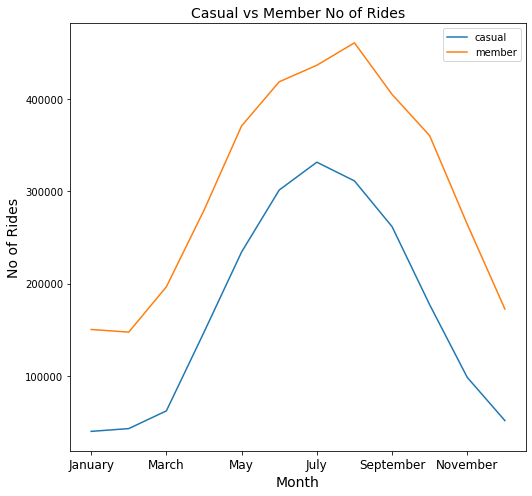

In [204]:
img = count_df.plot(figsize=(7.5,7))
img.set_ylabel("No of Rides", fontsize=14)
img.set_xlabel("Month", fontsize=14)
img.set_title("Casual vs Member No of Rides", fontsize=14)
img.tick_params(axis='x', labelsize=12)
legend_labels = ['casual', 'member']
plt.legend(legend_labels)
plt.tight_layout()

img.get_figure().savefig('../Report/images/no_of_rides.pdf')
img

In [ ]:
#20
# converts seconds into string HH:MM:SS format or DD days HH:MM:SS
def format_time(seconds):
    # if the input is an integer or a float
    if isinstance(seconds,int) or isinstance(seconds,float):    
        min, sec    = divmod(seconds, 60)
        hour, min   = divmod(min, 60)

        if hour >= 24:
            day, hour   = divmod(hour, 24)
            return '%02d days %02d:%02d:%02d' % (day, hour, min, sec)
        
        return '%02d:%02d:%02d' % (hour, min, sec)
    
    return seconds

In [14]:
#21
def seconds_minutes(seconds):
    if isinstance(seconds,int) or isinstance(seconds,float):    
        return int(seconds/60)
    else:
        return seconds
    
def seconds_hours(seconds):
    if isinstance(seconds,int) or isinstance(seconds,float):    
        return int(seconds/(60*60))
    else:
        return seconds

def seconds_days(seconds):
    if isinstance(seconds,int) or isinstance(seconds,float):    
        return int(seconds/(60*60*24))
    else:
        return seconds

In [63]:
#22
#input:  dataset, and what to use in order to groupby
#output: dataframe which contains statistics per month, and list of whole year statistics
def mean_max_mode(dataset, list_to_groupby=['Month']):
    
    df = dataset.groupby(list_to_groupby).agg({'ride_length':['mean','max'], 
                                               'day_of_week': [('mode', lambda x: x.mode().iloc[0])]})

    year_statistics  = [format_time(df['ride_length','mean'].mean()), format_time(df['ride_length','max'].max()), df['day_of_week','mode'].mode()[0]]

    # plotting should be done here before converting the format
    #df.plot()

    # applymap works element-wise on the dataframe
    # convert seconds to timestaps
    df = df.applymap(format_time)

    # when the df has a single index then reindex, otherwise multi-index we have to use reorder
    df = df.reindex(month_order) if len(list_to_groupby) == 1 else df.reorder_levels(order=[0, 1]).loc[month_order]

    return df, year_statistics

In [64]:
#23
mmm_allusers, stats = mean_max_mode(prepared_data)
display(mmm_allusers)
print(f"\033[1mYear 2023: {stats[0]}  {stats[1]} \t{stats[2]} \t\033[0m")

ride_length                   day_of_week
                 mean               max        mode
Month                                              
January      00:13:00  23 days 08:03:44     Tuesday
February     00:13:31  13 days 02:25:46     Tuesday
March        00:13:04  11 days 16:08:04   Wednesday
April        00:17:12  12 days 18:35:29    Saturday
May          00:19:02  20 days 06:50:31     Tuesday
June         00:19:59  20 days 11:05:58      Friday
July         00:21:44  35 days 17:41:24    Saturday
August       00:22:25  68 days 09:29:04   Wednesday
September    00:17:52  01 days 01:07:46    Saturday
October      00:15:41  01 days 00:59:57     Tuesday
November     00:13:49  01 days 01:00:25    Thursday
December     00:13:24  01 days 00:59:57      Friday

Year 2023: 00:16:44  68 days 09:29:04 	Tuesday 	


In [65]:
df2, stats2 = mean_max_mode(prepared_data, list_to_groupby=['Month', 'member_casual'])
display(df2)

ride_length                   day_of_week
                               mean               max        mode
Month     member_casual                                          
January   casual           00:22:54  23 days 08:03:44     Tuesday
          member           00:10:21  01 days 00:59:56     Tuesday
February  casual           00:23:11  13 days 02:25:46      Sunday
          member           00:10:42  01 days 00:59:56     Tuesday
March     casual           00:21:24  11 days 16:08:04   Wednesday
          member           00:10:26  01 days 01:59:40   Wednesday
April     casual           00:27:40  12 days 18:35:29    Saturday
          member           00:11:41  01 days 00:59:56    Thursday
May       casual           00:28:31  20 days 06:50:31      Sunday
          member           00:13:02  01 days 01:00:31     Tuesday
June      casual           00:29:24  20 days 11:05:58    Saturday
          member           00:13:12  01 days 00:59:56      Friday
July      casual           00:32:20  35 days 17:41:24    Saturday
          member           00:13:41  01 days 00:59:57      Monday
August    casual           00:35:14  68 days 09:29:04    Saturday
          member           00:13:46  01 days 00:59:57     Tuesday
September casual           00:25:11  01 days 01:07:46    Saturday
          member           00:13:08  01 days 00:59:57      Friday
October   casual           00:22:52  01 days 00:59:57      Sunday
          member           00:12:09  01 days 00:59:56     Tuesday
November  casual           00:19:54  01 days 01:00:25    Saturday
          member           00:11:34  01 days 00:59:56    Thursday
December  casual           00:19:56  01 days 00:59:57    Saturday
          member           00:11:26  01 days 00:59:56      Friday

In [201]:
#24
# Calculate the average and maximum ride_length for members and casual riders using pivot table
def mean_max_by_month(dataset):
    mm_member_casual = dataset.pivot_table(index="Month", columns='member_casual', values=["ride_length"], 
                         aggfunc={'ride_length':['max','mean']})

    mm_member_casual = mm_member_casual.reindex(month_order)

    stats  = [format_time(mm_member_casual['ride_length', 'mean', 'member'].mean()), 
          format_time(mm_member_casual['ride_length', 'mean', 'casual'].mean()), 
          format_time(mm_member_casual['ride_length','max', 'member'].max()),
          format_time(mm_member_casual['ride_length','max', 'casual'].max())]

    
    return mm_member_casual, stats

In [202]:
mm_member_casual, stats = mean_max_by_month(prepared_data)
mm_member_casual_formated = mm_member_casual.applymap(format_time)

column_order = [('ride_length', 'mean', 'member'),
                ('ride_length', 'mean', 'casual'),
                ('ride_length', 'max', 'member'),
                ('ride_length', 'max', 'casual')]

mm_member_casual_formated = mm_member_casual_formated[column_order]
display(mm_member_casual_formated)
print(f"\033[1m    Year 2023:  {stats[0]}  {stats[1]}  {stats[2]} {stats[3]}\033[0m")

ride_length                                              
                     mean                         max                  
member_casual      member    casual            member            casual
Month                                                                  
January          00:10:21  00:22:54  01 days 00:59:56  23 days 08:03:44
February         00:10:42  00:23:11  01 days 00:59:56  13 days 02:25:46
March            00:10:26  00:21:24  01 days 01:59:40  11 days 16:08:04
April            00:11:41  00:27:40  01 days 00:59:56  12 days 18:35:29
May              00:13:02  00:28:31  01 days 01:00:31  20 days 06:50:31
June             00:13:12  00:29:24  01 days 00:59:56  20 days 11:05:58
July             00:13:41  00:32:20  01 days 00:59:57  35 days 17:41:24
August           00:13:46  00:35:14  01 days 00:59:57  68 days 09:29:04
September        00:13:08  00:25:11  01 days 00:59:57  01 days 01:07:46
October          00:12:09  00:22:52  01 days 00:59:56  01 days 00:59:57
November         00:11:34  00:19:54  01 days 00:59:56  01 days 01:00:25
December         00:11:26  00:19:56  01 days 00:59:56  01 days 00:59:57

    Year 2023:  00:12:06  00:25:42  01 days 01:59:40 68 days 09:29:04


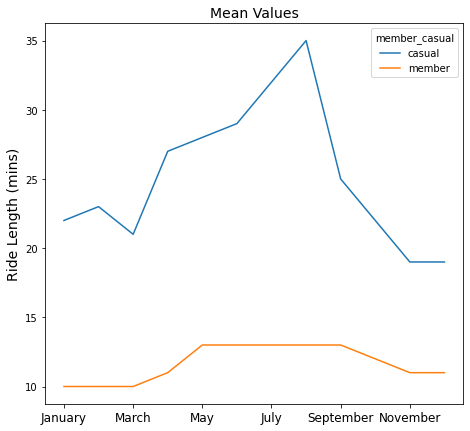

In [188]:

img = mm_member_casual.applymap(seconds_minutes)[('ride_length', 'mean')].plot(figsize=(7.5,7))
img.set_ylabel("Ride Length (mins)", fontsize=14)
img.set_xlabel("", fontsize=14)
img.set_title("Mean Values", fontsize=14)
img.tick_params(axis='x', labelsize=12)
img.get_figure().savefig('../Report/images/mean_cvsm_month.pdf')

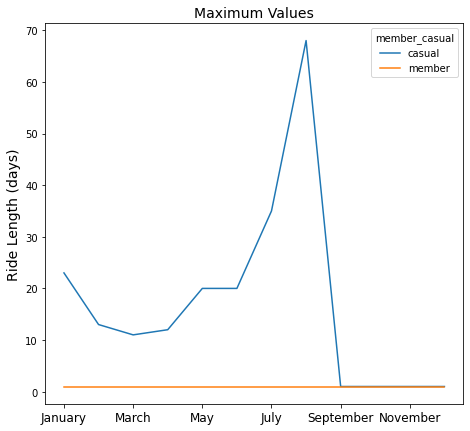

In [189]:
img2 = mm_member_casual.applymap(seconds_days)[('ride_length', 'max')].plot(figsize=(7.5,7))
img2.set_ylabel("Ride Length (days)", fontsize=14)
img2.set_xlabel("", fontsize=14)
img2.set_title("Maximum Values", fontsize=14)
img2.tick_params(axis='x', labelsize=12)
img2.get_figure().savefig('../Report/images/max_cvsm.pdf')

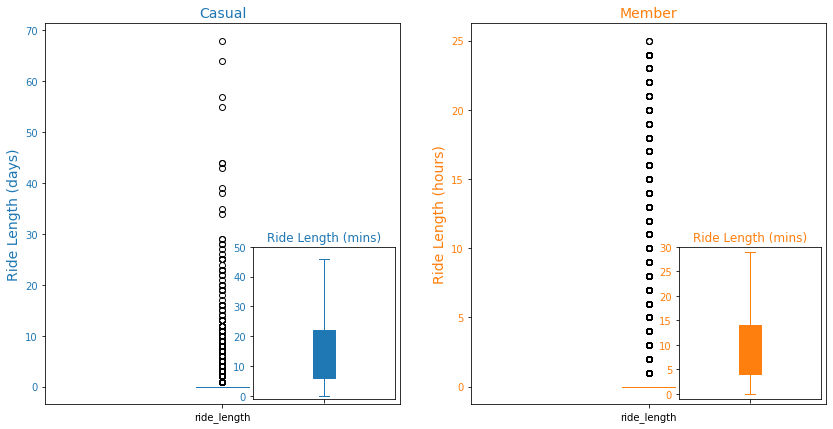

In [16]:
df = prepared_data#.loc['August']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

color = 'tab:blue'
axes[0].set_title('Casual', fontsize=14, color=color)
axes[0].set_ylabel('Ride Length (days)', fontsize=14, color=color)
df[df['member_casual'] == 'casual'].applymap(seconds_days).plot(kind='box', ax=axes[0], color=color, meanline=True)
axes[0].tick_params(axis='y', labelcolor=color)

# inset axes
ax_inset1   = inset_axes(axes[0], width="40%", height="40%", loc='lower right')
df[df['member_casual'] == 'casual'].applymap(seconds_minutes).plot(kind='box', ax=ax_inset1, color=color, showfliers=False, patch_artist=True)
ax_inset1.set_ylim(-1,50)
ax_inset1.set_title('Ride Length (mins)', color=color)
ax_inset1.tick_params(axis='x', labelbottom=False)
ax_inset1.tick_params(axis='y', labelcolor=color)

color = 'tab:orange'
axes[1].set_title('Member', fontsize=14, color=color)
axes[1].set_ylabel('Ride Length (hours)', fontsize=14, color=color)
df[df['member_casual'] == 'member'].applymap(seconds_hours).plot(kind='box', ax=axes[1], color=color)
axes[1].tick_params(axis='y', labelcolor=color)


# inset axes
ax_inset2   = inset_axes(axes[1], width="40%", height="40%", loc='lower right')
df[df['member_casual'] == 'member'].applymap(seconds_minutes).plot(kind='box', ax=ax_inset2, color=color, showfliers=False, patch_artist=True)
ax_inset2.set_ylim(-1,30)
ax_inset2.set_title('Ride Length (mins)', color=color)
ax_inset2.tick_params(axis='x', labelbottom=False)
ax_inset2.tick_params(axis='y', labelcolor=color)

plt.show()
fig.savefig('../Report/images/boxplot_distribution.pdf')

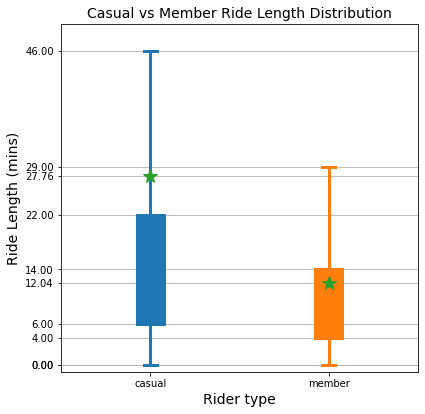

In [99]:

df = prepared_data.applymap(seconds_minutes)
members = df[df.member_casual == 'member'].ride_length
casuals = df[df.member_casual == 'casual'].ride_length

fig, ax1 = plt.subplots(figsize=(6.4, 6.4))

box_plot_items = ax1.boxplot([casuals, members], showfliers=False, showmeans=True, labels=['casual', 'member'], patch_artist=True)
plt.title('Casual vs Member Ride Length Distribution', fontsize=14) 
plt.xlabel('Rider type', fontsize=14) 
plt.ylabel('Ride Length (mins)', fontsize=14) 

# colouring
colors1 = ['tab:blue', 'tab:orange']
colors2 = ['tab:blue', 'tab:blue', 'tab:orange', 'tab:orange']
wid = 3
for type in ['boxes', 'whiskers', 'caps', 'means', 'medians']:
    for i, box in enumerate(box_plot_items[type]):
        if type in ['boxes', 'medians']:
            box.set(color=colors1[i], linewidth=wid)
        elif type == 'means':
            box.set(marker='*', markersize=15)
        else:
            box.set(color=colors2[i], linewidth=wid)

    
# Get the quartiles, whiskers and means for both boxes
quartiles_data1 = [item.get_ydata()[0] for type in ['whiskers', 'caps', 'means'] for item in box_plot_items[type]]
all_ticks = sorted(quartiles_data1)

ax1.grid(True, axis='y')
ax1.set_yticks(all_ticks)
ax1.set_ylim(-1, 50)

plt.savefig('../Report/images/boxplot_distribution2.pdf')
plt.show()

In [ ]:
#Calculate the number of rides for users by day_of_week
dataset = prepared_data
count_day_of_week = dataset.pivot_table(index=["Month", 'member_casual'], columns="day_of_week", values="rideable_type", aggfunc={'rideable_type': [('No of Rides', 'count')]})

count_day_of_week.plot()
col_order = [('No of Rides', 'Monday'), ('No of Rides','Tuesday'), ('No of Rides','Wednesday'), ('No of Rides','Thursday'), ('No of Rides','Friday'), ('No of Rides','Saturday'), ('No of Rides','Sunday')]

count_day_of_week = count_day_of_week[col_order]#.reindex(month_order)
count_day_of_week

In [205]:
# Calculate the average ride_length for members and casual riders by day_of_week
def mean_by_day_of_week(dataset):
    mean_day_of_week = dataset.pivot_table(index=["day_of_week"], columns="member_casual", values="ride_length", aggfunc={'ride_length':'mean'})

    row_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    mean_day_of_week = mean_day_of_week.reindex(row_order)
    mean_day_of_week = mean_day_of_week.rename(index={'Monday': 'Mon', 'Tuesday': 'Tue', 'Wednesday': 'Wed', 'Thursday':'Thu', 'Friday':'Fri', 'Saturday':'Sat', 'Sunday':'Sun'})
    return mean_day_of_week

In [209]:
mean_day_of_week = mean_by_day_of_week(prepared_data)
mean_day_of_week_formated = mean_day_of_week.applymap(format_time)
print("")
print("")
display(mean_day_of_week_formated)
print("")
print("")

member_casual,casual,member
day_of_week,,
Mon,00:27:42,00:11:54
Tue,00:25:05,00:12:00
Wed,00:24:18,00:11:56
Thu,00:24:43,00:12:01
Fri,00:27:15,00:12:28
Sat,00:32:08,00:13:56
Sun,00:32:51,00:13:59


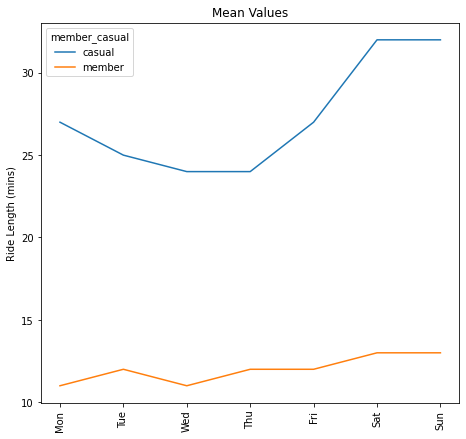

In [208]:
img3 = mean_day_of_week.applymap(seconds_minutes).plot(figsize=(7.5,7))
img3.set_xlabel('')
img3.tick_params(axis='x', rotation=90)
img3.set_ylabel("Ride Length (mins)")
img3.set_title("Mean Values")
img3.get_figure().savefig('../Report/images/mean_cvsm_dayofweek.pdf')

In [178]:
prepared_data

rideable_type member_casual  ride_length day_of_week
Month    row_id                                                      
January  0       electric_bike        member          651    Saturday
         1        classic_bike        member          509     Tuesday
         2       electric_bike        casual          794      Monday
         3        classic_bike        member          526      Sunday
         4        classic_bike        member          919    Thursday
...                        ...           ...          ...         ...
December 224068  electric_bike        casual          133    Thursday
         224069   classic_bike        casual          215      Friday
         224070   classic_bike        member          230     Tuesday
         224071  electric_bike        casual         1058    Saturday
         224072   classic_bike        member          218      Monday

[5719605 rows x 4 columns]

In [210]:
# look at rideable types
def count_rideable_type(dataset):
    rideable_types_df = dataset.pivot_table(index=["member_casual"], columns="rideable_type", values="ride_length", aggfunc={'ride_length':'count'})
    rideable_types_df.fillna(0, inplace=True)
    return rideable_types_df

In [211]:
rideable_types_df = count_rideable_type(prepared_data)
rideable_types_df_formatted = rideable_types_df.applymap(lambda x: format(int(x), ','))
display(rideable_types_df_formatted)

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,"876,858","78,287","1,103,892"
member,"1,819,110",0,"1,841,458"


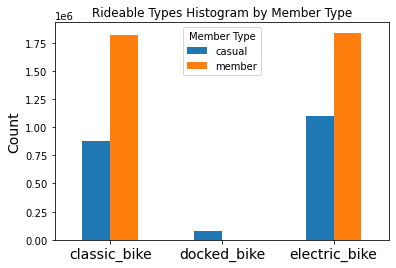

In [197]:
rideable_types_df_transposed = rideable_types_df.transpose()

# Plot the transposed DataFrame
rideable_types_df_transposed.plot(kind='bar')
plt.title("Rideable Types Histogram by Member Type")
plt.tick_params(axis='x', labelsize=14, rotation=0)
plt.ylabel("Count", fontsize=14)
plt.xlabel("")
plt.legend(title="Member Type")
plt.savefig('../Report/images/rideable_types.pdf')
plt.show()